In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from datasets import load_dataset
dataset = load_dataset("reczoo/Criteo_x1", split="train").select(range(50000))
df = dataset.to_pandas()


d:\ctrPrediction\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Repo card metadata block was not found. Setting CardData to empty.


In [5]:
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (50000, 40)


,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,1,0.0,0.008292,0.11,0.10,0.160344,0.068,0.02,0.08,0.010,...,1528983,1528994,1534050,1536021,1536022,1934144,1934163,1934311,2022806,2024736
1,1,0.0,0.134328,0.02,0.30,0.067359,0.170,0.04,0.36,0.460,...,1528982,1529471,1533924,1536018,1707732,1934144,1934163,1935911,2022801,2022897
2,0,0.0,0.003317,0.00,0.00,0.077438,0.000,0.00,0.74,0.194,...,1528986,1529049,1533924,1536018,1536023,1934144,1934169,1934181,2022801,2022897
3,1,1.0,0.533997,0.00,0.08,0.000078,0.008,0.89,0.80,0.176,...,1528988,1529017,1533924,1536018,1536209,1934144,1934163,1934312,2022801,2022897
4,0,0.0,0.097844,0.02,0.00,0.000000,0.000,0.00,0.00,0.002,...,1528990,1529030,1533924,1536018,1536025,1934144,1934167,1934181,2022801,2022897


In [6]:
df.describe()


,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,0.252860,0.077900,0.098874,0.105969,0.102703,0.154269,0.139064,0.108207,0.259282,0.179018,...,1.528984e+06,1.529209e+06,1.533959e+06,1.536019e+06,1.552618e+06,1.934144e+06,1.934165e+06,1.936324e+06,2.022803e+06,2.024211e+06
std,0.434656,0.190539,0.224089,0.197994,0.153484,0.257120,0.243306,0.206227,0.268645,0.254333,...,2.340853e+00,4.061893e+02,1.377606e+02,1.193844e+00,5.395996e+04,7.804319e-01,2.102336e+00,7.614445e+03,4.059165e+00,5.207255e+03
min,0.000000,0.000000,0.001658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.528982e+06,1.528992e+06,1.533924e+06,1.536018e+06,1.536022e+06,1.934144e+06,1.934163e+06,1.934178e+06,2.022801e+06,2.022897e+06
25%,0.000000,0.000000,0.004975,0.010000,0.000000,0.010141,0.000000,0.000000,0.040000,0.016000,...,1.528982e+06,1.529003e+06,1.533924e+06,1.536018e+06,1.536024e+06,1.934144e+06,1.934163e+06,1.934183e+06,2.022801e+06,2.022897e+06
50%,0.000000,0.000000,0.008292,0.030000,0.040000,0.037234,0.032000,0.030000,0.160000,0.072000,...,1.528983e+06,1.529055e+06,1.533925e+06,1.536019e+06,1.536111e+06,1.934144e+06,1.934164e+06,1.934224e+06,2.022802e+06,2.022898e+06
75%,1.000000,0.050000,0.059701,0.100000,0.140000,0.155180,0.144000,0.100000,0.400000,0.216000,...,1.528985e+06,1.529222e+06,1.533925e+06,1.536020e+06,1.538570e+06,1.934144e+06,1.934166e+06,1.934819e+06,2.022804e+06,2.023086e+06
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.528991e+06,1.533861e+06,1.535999e+06,1.536021e+06,1.934082e+06,1.934155e+06,1.934176e+06,2.022753e+06,2.022864e+06,2.086730e+06


In [7]:
missing_counts = df.isnull().sum()
print("Missing values per column:")
print(missing_counts[missing_counts > 0])


Missing values per column:
Series([], dtype: int64)


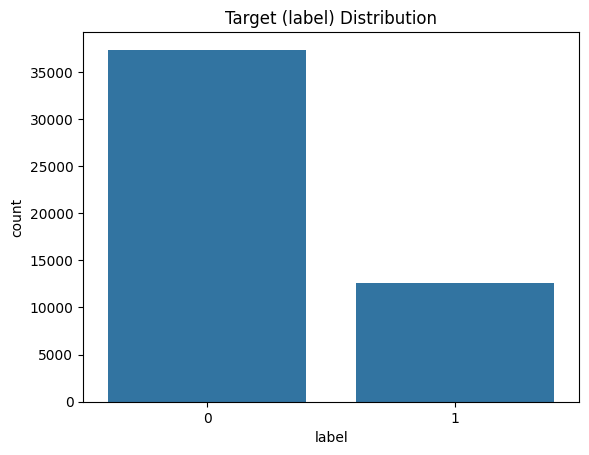

In [8]:
sns.countplot(x='label', data=df)
plt.title("Target (label) Distribution")
plt.show()

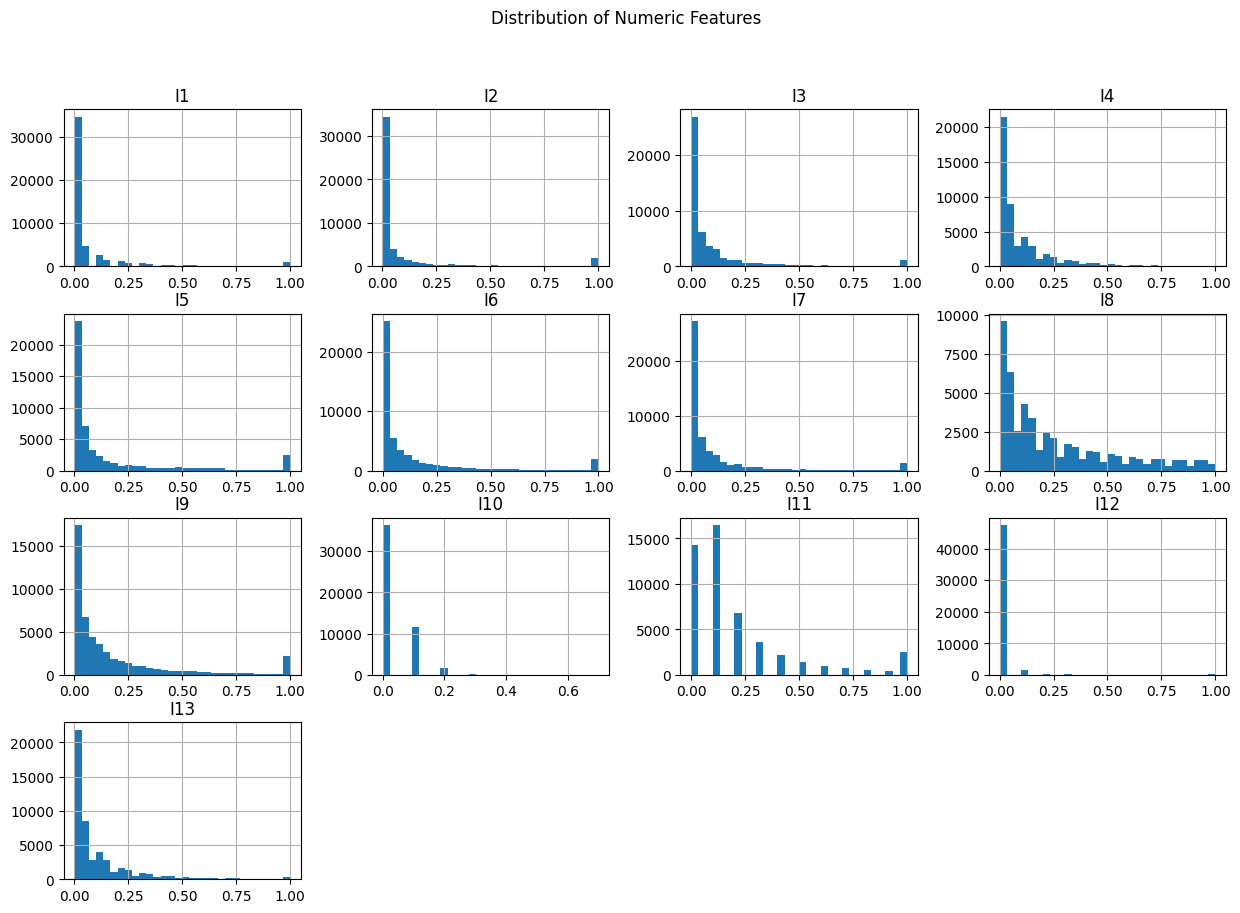

In [9]:
int_features = [col for col in df.columns if col.startswith("I")]
df[int_features].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of Numeric Features")
plt.show()


In [10]:
cat_features = [col for col in df.columns if col.startswith("C")]


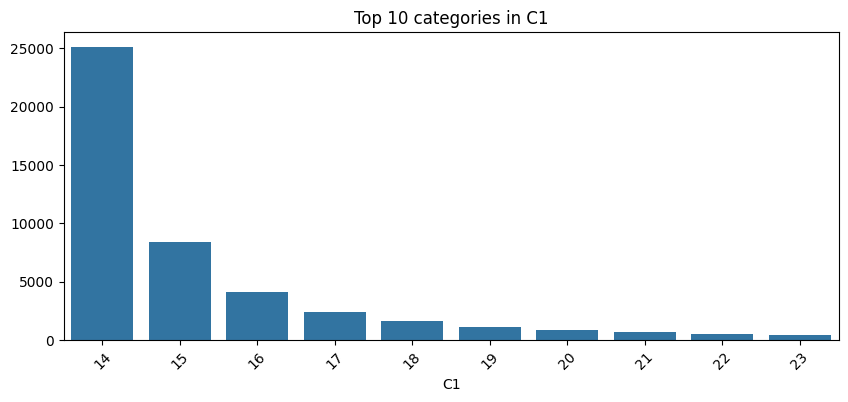

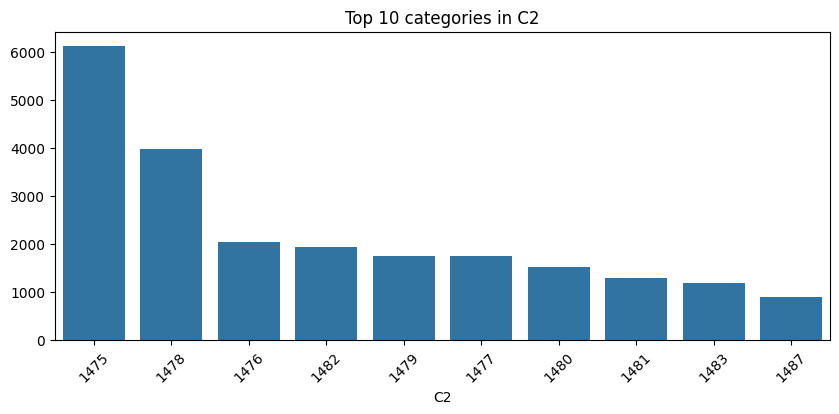

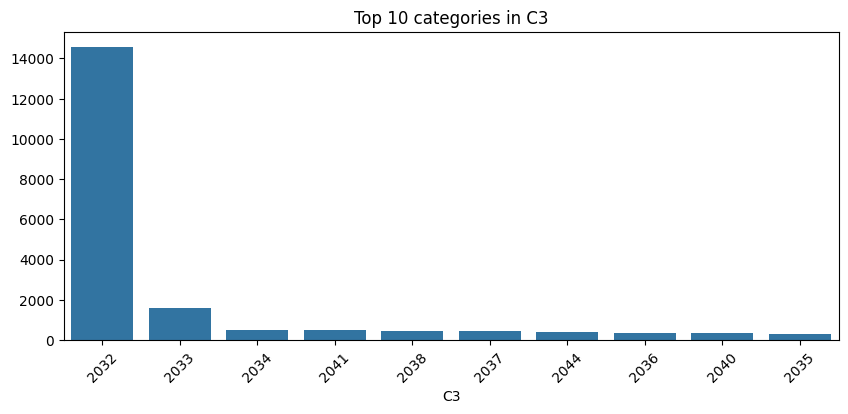

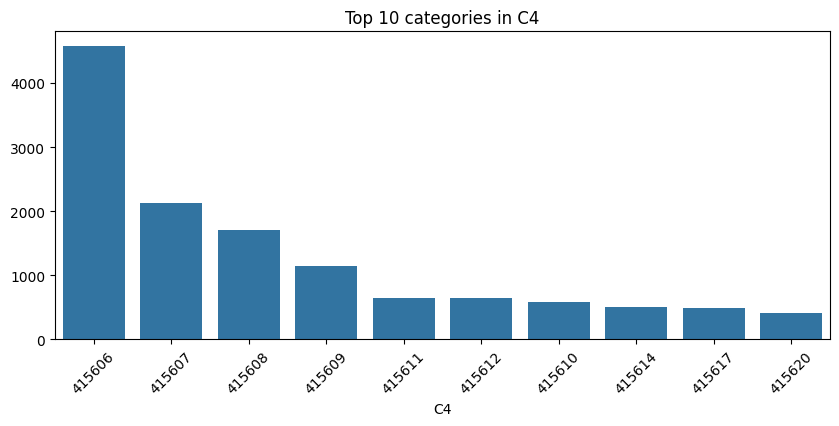

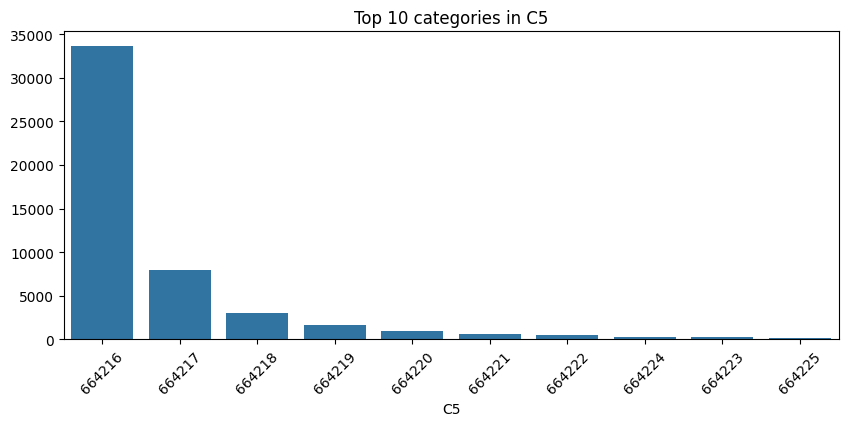

In [11]:
for col in cat_features[:5]:  
    top_cats = df[col].value_counts().head(10)
    plt.figure(figsize=(10,4))
    sns.barplot(x=top_cats.index.astype(str), y=top_cats.values)
    plt.title(f"Top 10 categories in {col}")
    plt.xticks(rotation=45)
    plt.show()

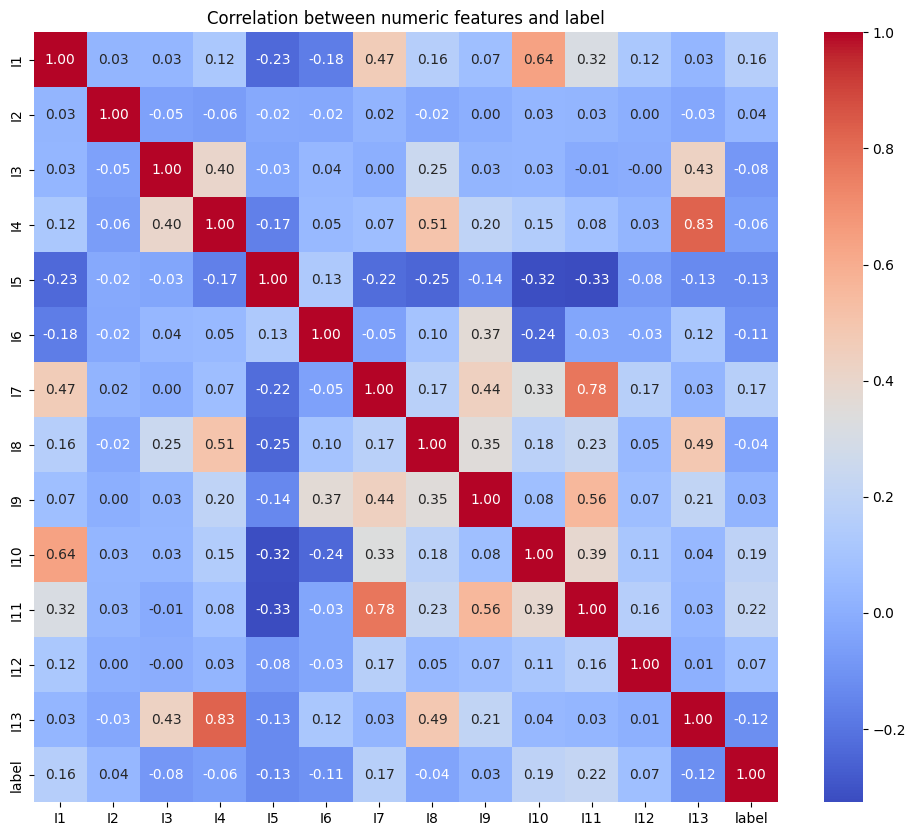

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df[int_features + ['label']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation between numeric features and label")
plt.show()